In [1]:
"""Importing Important libraries"""

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as sk
from sklearn.model_selection import train_test_split 

In [4]:
"""Load Dataset"""
data_class = pd.read_csv('raw_data/class.csv', sep='|')
data_class.set_index('lineID', inplace=True, drop='True')
data_items = pd.read_csv('raw_data/items.csv', sep='|')
data_realclass = pd.read_csv('raw_data/realclass.csv', sep='|')
data_train = pd.read_csv('raw_data/train.csv', sep='|')

In [5]:
data_realclass.rename(columns={'revenue': 'actual_revenue'}, inplace= True)
data_realclass.set_index('lineID', inplace=True, drop=True)

In [6]:
# Merge Train and items df
data_new = pd.merge(data_train, data_items, how='left', on='pid')

# Merge for test data
test_data = data_class.join(data_realclass, on='lineID', how='inner')
test_data = pd.merge(test_data, data_items, how = 'left', on='pid')

In [ ]:
# save_path = 'august_data/'
# import os 
# os.makedirs(save_path)
# data_new.to_csv(save_path + 'data_new.csv')

In [7]:
data_new.columns

Index(['lineID', 'day', 'pid', 'adFlag', 'availability', 'competitorPrice',
       'click', 'basket', 'order', 'price', 'revenue', 'manufacturer', 'group',
       'content', 'unit', 'pharmForm', 'genericProduct', 'salesIndex',
       'category', 'campaignIndex', 'rrp'],
      dtype='object')

In [8]:
test_data.columns

Index(['day', 'pid', 'adFlag', 'availability', 'competitorPrice', 'price',
       'actual_revenue', 'manufacturer', 'group', 'content', 'unit',
       'pharmForm', 'genericProduct', 'salesIndex', 'category',
       'campaignIndex', 'rrp'],
      dtype='object')

In [9]:
"""Data Exploration and Feature Engineering"""

df = data_new

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756003 entries, 0 to 2756002
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   lineID           int64  
 1   day              int64  
 2   pid              int64  
 3   adFlag           int64  
 4   availability     int64  
 5   competitorPrice  float64
 6   click            int64  
 7   basket           int64  
 8   order            int64  
 9   price            float64
 10  revenue          float64
 11  manufacturer     int64  
 12  group            object 
 13  content          object 
 14  unit             object 
 15  pharmForm        object 
 16  genericProduct   int64  
 17  salesIndex       int64  
 18  category         float64
 19  campaignIndex    object 
 20  rrp              float64
dtypes: float64(5), int64(11), object(5)
memory usage: 441.6+ MB


In [11]:
df = df.drop(columns=['lineID', 'pid'])

In [12]:
# Numerical and Categorical columns
cat_cols = ['group', 'content', 'unit', 'pharmForm', 'campaignIndex']
num_cols = [i for i in df.columns if i not in cat_cols]

In [13]:
cat_cols

['group', 'content', 'unit', 'pharmForm', 'campaignIndex']

In [14]:
num_cols

['day',
 'adFlag',
 'availability',
 'competitorPrice',
 'click',
 'basket',
 'order',
 'price',
 'revenue',
 'manufacturer',
 'genericProduct',
 'salesIndex',
 'category',
 'rrp']

In [15]:
"""Handling Missing Values"""
# In Numerical columns

'Handling Missing Values'

In [16]:
df[num_cols].isna().sum()

day                     0
adFlag                  0
availability            0
competitorPrice    100687
click                   0
basket                  0
order                   0
price                   0
revenue                 0
manufacturer            0
genericProduct          0
salesIndex              0
category            87394
rrp                     0
dtype: int64

In [17]:
# So, there are two columns with extreme null values 
df['price_diff'] = df['price'] - df['competitorPrice']

In [18]:
print("Mean Difference bw price and comp price: ", df['price_diff'].mean())
print("\nInfo: ", df['price_diff'].describe())

Mean Difference bw price and comp price:  0.8650459342692172

Info:  count    2.655316e+06
mean     8.650459e-01
std      3.949754e+00
min     -1.423900e+02
25%     -4.000000e-02
50%      7.300000e-01
75%      1.850000e+00
max      1.368700e+02
Name: price_diff, dtype: float64


In [19]:
# Since the difference is just 0.86 we can select a value like 1 or 2 to impute the remaining ones 

# We ll fill the missing values for comp price with 1
df['compPrice'] = df['competitorPrice'].fillna(df['price'] - 1)

Null values:  87394


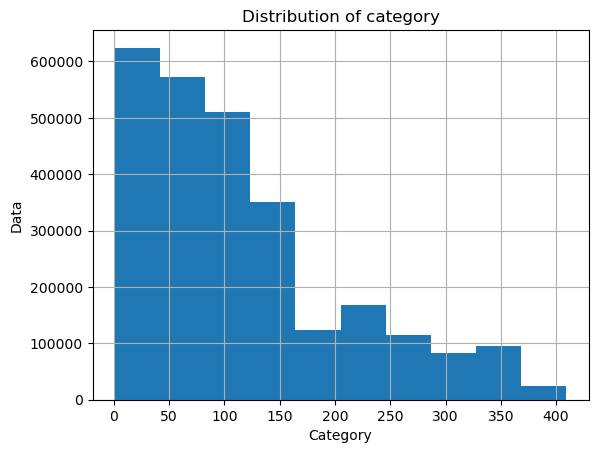

In [20]:
# Now for Category Column 
print("Null values: ", df['category'].isna().sum())
# Create a histogram
plt.hist(df['category'])  # You can also use df['column_name']

# Customize the plot (optional)
plt.xlabel('Category')  # Label for the x-axis
plt.ylabel('Data')  # Label for the y-axis
plt.title('Distribution of {}'.format('category'))  # Plot title
plt.grid(True)  # Add gridlines for better readability

# Display the plot
plt.show()

In [21]:
# So there are 400+ unique categories
# #1 We can randomly select (we assume these fall on these cats)
# #2 We can drop the rows 

# We choose to remove the rows 
df = df.dropna(subset=['category'])

In [22]:
df.shape

(2668609, 21)

In [23]:
df.columns

Index(['day', 'adFlag', 'availability', 'competitorPrice', 'click', 'basket',
       'order', 'price', 'revenue', 'manufacturer', 'group', 'content', 'unit',
       'pharmForm', 'genericProduct', 'salesIndex', 'category',
       'campaignIndex', 'rrp', 'price_diff', 'compPrice'],
      dtype='object')

In [24]:
df = df.drop(columns=['competitorPrice', 'price_diff'])

Hurray! We handled missing values!

In [25]:
"""Handling missing vals in Categorical columns"""

cat_cols

['group', 'content', 'unit', 'pharmForm', 'campaignIndex']

In [26]:
df[cat_cols].isna().sum()

group                  0
content                0
unit                   0
pharmForm         181456
campaignIndex    2202931
dtype: int64

In [27]:
vc = df.pharmForm.value_counts()
top_five_cols = vc.head(5) 

In [33]:
print(f"Number of categories in vc: {len(vc)}")
vc

Number of categories in vc: 227


pharmForm
TAB    249499
CRE    189935
FTA    179827
GEL    144812
KAP    131536
        ...  
Saf         6
Lut         5
DES         4
Wka         3
Kmr         3
Name: count, Length: 227, dtype: int64

In [28]:
top_five_cols

pharmForm
TAB    249499
CRE    189935
FTA    179827
GEL    144812
KAP    131536
Name: count, dtype: int64

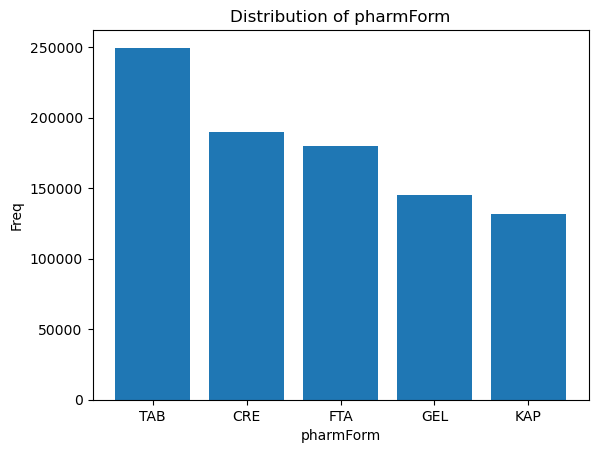

In [29]:
# pharmForm
df['pharmForm']

pharm_counts = df.pharmForm.value_counts()
# plt.figure(figsize=(10, 5))
plt.bar(top_five_cols.index, top_five_cols.values)

plt.xlabel('pharmForm')
plt.ylabel('Freq')
plt.title(f"Distribution of pharmForm")
plt.show()

In [34]:
df['pharmForm'].mode()[0]

'TAB'

In [35]:
# fill this column with mode
df['pharmForm'].fillna(df['pharmForm'].mode()[0], inplace = True)

In [36]:
"""Campaign Index"""
print("null", df['campaignIndex'].isna().sum())

# Since there are more than 90% missing vals, we need to drop this column 
df.drop(columns=['campaignIndex'], inplace= True)

null 2202931


In [37]:
df.columns

Index(['day', 'adFlag', 'availability', 'click', 'basket', 'order', 'price',
       'revenue', 'manufacturer', 'group', 'content', 'unit', 'pharmForm',
       'genericProduct', 'salesIndex', 'category', 'rrp', 'compPrice'],
      dtype='object')

In [38]:
cat_cols

['group', 'content', 'unit', 'pharmForm', 'campaignIndex']

In [39]:
cat_cols.pop(-1)

'campaignIndex'

In [40]:
df[cat_cols].isna().sum()

group        0
content      0
unit         0
pharmForm    0
dtype: int64

TADAAAA!!! handled all missing values 

-> lets save this dataframe 

In [41]:
df.to_csv('august_data/df_missing_value_handled.csv')

In [42]:
df.isna().sum()

day               0
adFlag            0
availability      0
click             0
basket            0
order             0
price             0
revenue           0
manufacturer      0
group             0
content           0
unit              0
pharmForm         0
genericProduct    0
salesIndex        0
category          0
rrp               0
compPrice         0
dtype: int64

---
### **EDA enters the chat**

In [48]:
df = pd.read_csv('august_data/df_missing_value_handled.csv', index_col=0)

In [49]:
df.head(3)

,day,adFlag,availability,click,basket,order,price,revenue,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,rrp,compPrice
0,1,0,2,1,0,0,16.89,0.0,255,2FOI,50,ML,TRO,0,40,193.0,18.25,14.60
1,1,1,1,0,1,0,8.75,0.0,18,1COJ0FIK,50,ST,TAB,1,40,66.0,18.81,8.57
2,1,0,1,0,1,0,16.06,0.0,41,22OI7,2X50,ML,STI,0,53,40.0,18.48,14.77


In [50]:
# Numerical and Categorical columns
cat_cols = ['group', 'content', 'unit', 'pharmForm']
num_cols = [i for i in df.columns if i not in cat_cols]

In [51]:
# df.drop(columns=['Unnamed: 0'], inplace=True)

In [52]:
num_cols = num_cols[1:]
num_cols

['adFlag',
 'availability',
 'click',
 'basket',
 'order',
 'price',
 'revenue',
 'manufacturer',
 'genericProduct',
 'salesIndex',
 'category',
 'rrp',
 'compPrice']

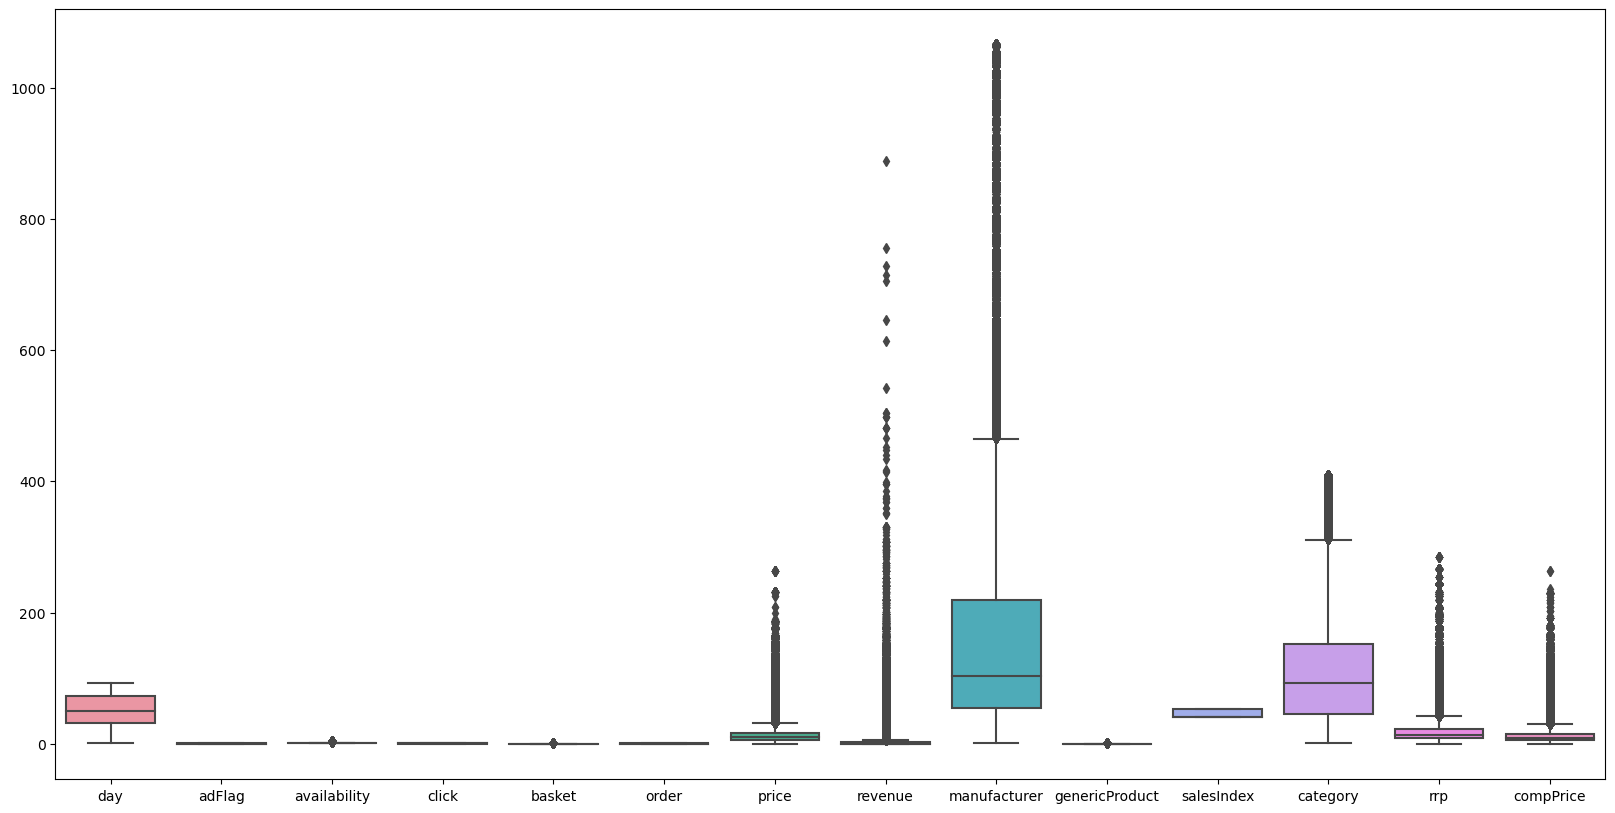

In [12]:
"""Outliers"""
# We need to find outliers in numerical cols 

# Boxplot for numerical columns
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[num_cols])
plt.show()

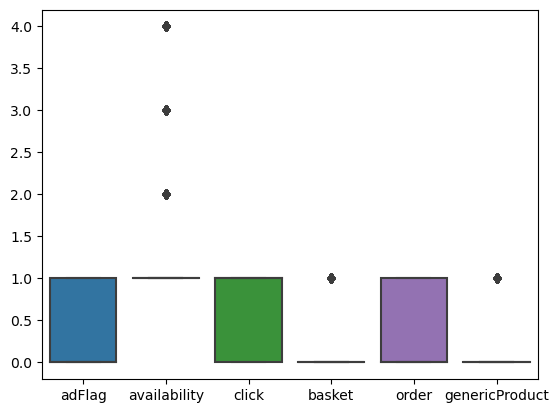

In [53]:
# Separate box plot for cols with low values 
sns.boxplot(data = df[['adFlag', 'availability', 'click', 'basket', 'order', 'genericProduct']])
plt.show()
# We wont consider this

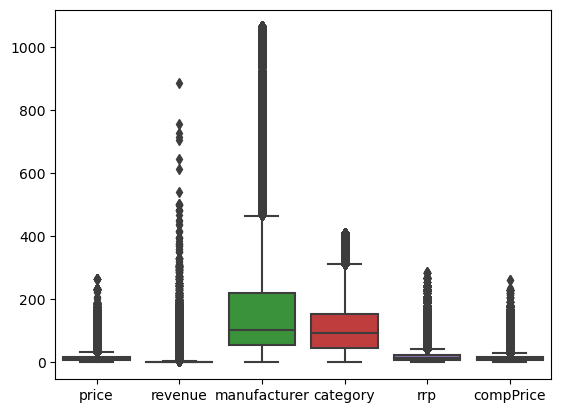

In [54]:
outlier_cols = ['price', 'revenue', 'manufacturer', 'category', 'rrp', 'compPrice']

sns.boxplot(data = df[outlier_cols])
plt.show()

In [55]:
import numpy as np

def get_outliers(data, whisker_factor=1.5):
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  iqr = q3 - q1
  lower_whisker = q1 - whisker_factor * iqr
  upper_whisker = q3 + whisker_factor * iqr
  outliers = [x for x in data if x < lower_whisker or x > upper_whisker]
  return outliers, len(outliers), lower_whisker, upper_whisker


In [56]:
# For revenue
out, n_out, l, u = get_outliers(df['revenue'])

In [45]:
# So, we cannot actually remove the outliers
# one thing can be done that is transformation(log transformation to bring the data closer to mean)

In [57]:
df

,day,adFlag,availability,click,basket,order,price,revenue,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,rrp,compPrice
0,1,0,2,1,0,0,16.89,0.00,255,2FOI,50,ML,TRO,0,40,193.0,18.25,14.60
1,1,1,1,0,1,0,8.75,0.00,18,1COJ0FIK,50,ST,TAB,1,40,66.0,18.81,8.57
2,1,0,1,0,1,0,16.06,0.00,41,22OI7,2X50,ML,STI,0,53,40.0,18.48,14.77
3,1,1,1,0,0,1,6.55,6.55,52,18OZ00IS,60,G,GEL,0,40,25.0,9.31,6.59
4,1,0,1,0,0,1,4.14,4.14,90,20OI0,25X2,ST,KOM,0,53,14.0,8.13,4.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755998,92,0,1,1,0,0,18.64,0.00,917,22OIE,15,ML,LOT,0,53,15.0,24.75,22.41
2755999,92,0,1,1,0,0,43.18,0.00,18,14OH2F,200,ST,KAP,0,40,100.0,46.09,36.87
2756000,92,0,1,1,0,0,5.59,0.00,334,21OKF,25,ST,DRA,0,53,1.0,5.88,4.71
2756001,92,1,1,0,1,0,6.33,0.00,84,13OK0FOK,50,G,SAL,0,40,90.0,9.58,6.59


Exploratory Analysis

> goal is to generate insights for feature selection (feature engineering)

In [58]:
"""Univariate Analysis"""

df.columns

Index(['day', 'adFlag', 'availability', 'click', 'basket', 'order', 'price',
       'revenue', 'manufacturer', 'group', 'content', 'unit', 'pharmForm',
       'genericProduct', 'salesIndex', 'category', 'rrp', 'compPrice'],
      dtype='object')

In [59]:
# df[''].unique()

uni_col = ['price', 'revenue', 'manufacturer', 'rrp', 'compPrice']

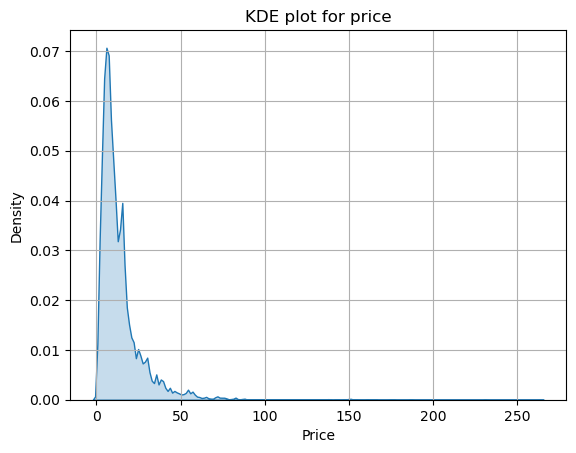

In [60]:
# Price
sns.kdeplot(data = df, x = 'price', fill = True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('KDE plot for price')
plt.grid(True)
plt.show()

In [61]:
# skewed 
# towards 0 
price_info = dict(df['price'].describe())

In [62]:
price_info

{'count': 2668609.0,
 'mean': 13.795504680528325,
 'std': 13.502578960912816,
 'min': 0.02,
 '25%': 5.96,
 '50%': 9.85,
 '75%': 16.45,
 'max': 263.53}

In [63]:
# The 75th percentile value is 16.45
# and after that the max value is 263
print(f"length of price col: {len(df['price'])}")

# ---> We get that most price values are below 16

length of price col: 2668609


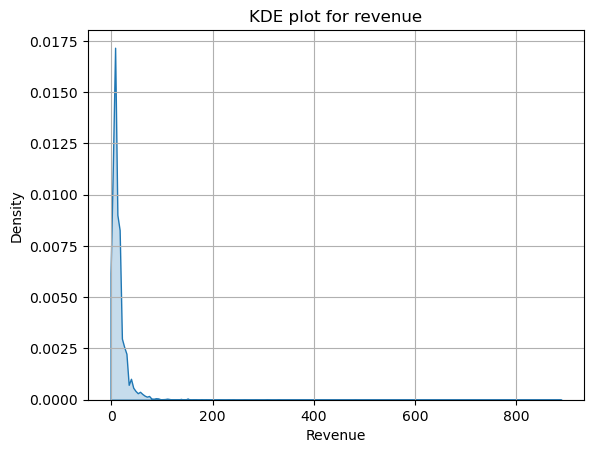

In [76]:
# Revenue
sns.kdeplot(data = df, x = 'revenue', fill = True)
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.title('KDE plot for revenue')
plt.grid(True)
plt.show()

In [64]:
# bc pura skewed h 
rev_info = dict(df['revenue'].describe())
rev_info 

{'count': 2668609.0,
 'mean': 3.7835291719393878,
 'std': 10.28077809578175,
 'min': 0.0,
 '25%': 0.0,
 '50%': 0.0,
 '75%': 2.15,
 'max': 887.7}

In [65]:
len(df[df['revenue']> 50.15])
# ---> Revenue is mostly around 1-10 for most part

23209

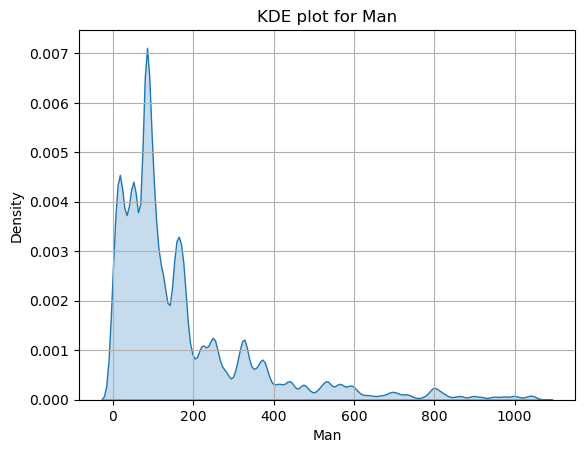

In [66]:
# Revenue
sns.kdeplot(data = df, x = 'manufacturer', fill = True)
plt.xlabel('Man')
plt.ylabel('Density')
plt.title('KDE plot for Man')
plt.grid(True)
plt.show()

In [67]:
man_info = dict(df['manufacturer'].describe())
man_info

{'count': 2668609.0,
 'mean': 171.19414159211783,
 'std': 183.8312874030783,
 'min': 1.0,
 '25%': 55.0,
 '50%': 103.0,
 '75%': 219.0,
 'max': 1066.0}

---
Bivariate Analysis

In [69]:
df = pd.read_csv('august_data/df_missing_value_handled.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,day,adFlag,availability,click,basket,order,price,revenue,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,rrp,compPrice
0,1,0,2,1,0,0,16.89,0.00,255,2FOI,50,ML,TRO,0,40,193.0,18.25,14.60
1,1,1,1,0,1,0,8.75,0.00,18,1COJ0FIK,50,ST,TAB,1,40,66.0,18.81,8.57
2,1,0,1,0,1,0,16.06,0.00,41,22OI7,2X50,ML,STI,0,53,40.0,18.48,14.77
3,1,1,1,0,0,1,6.55,6.55,52,18OZ00IS,60,G,GEL,0,40,25.0,9.31,6.59
4,1,0,1,0,0,1,4.14,4.14,90,20OI0,25X2,ST,KOM,0,53,14.0,8.13,4.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668604,92,0,1,1,0,0,18.64,0.00,917,22OIE,15,ML,LOT,0,53,15.0,24.75,22.41
2668605,92,0,1,1,0,0,43.18,0.00,18,14OH2F,200,ST,KAP,0,40,100.0,46.09,36.87
2668606,92,0,1,1,0,0,5.59,0.00,334,21OKF,25,ST,DRA,0,53,1.0,5.88,4.71
2668607,92,1,1,0,1,0,6.33,0.00,84,13OK0FOK,50,G,SAL,0,40,90.0,9.58,6.59


In [70]:
df.columns

Index(['day', 'adFlag', 'availability', 'click', 'basket', 'order', 'price',
       'revenue', 'manufacturer', 'group', 'content', 'unit', 'pharmForm',
       'genericProduct', 'salesIndex', 'category', 'rrp', 'compPrice'],
      dtype='object')

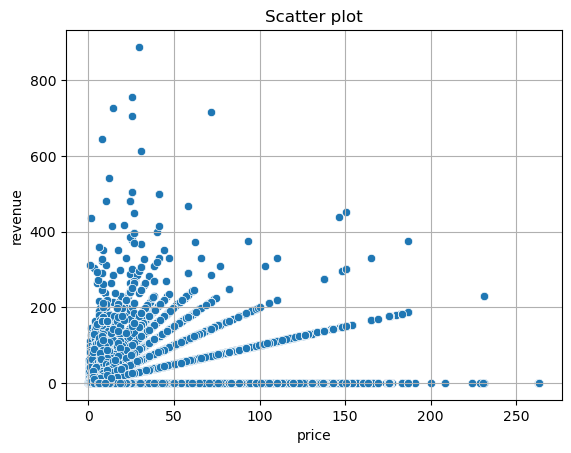

In [71]:
# uni_col = ['price', 'revenue', 'manufacturer', 'rrp', 'compPrice']

# price vs revenue 
x = 'price'
y = 'revenue'
sns.scatterplot(data=df, x=x, y=y)
plt.xlabel(x)
plt.ylabel(y)
plt.title("Scatter plot")
plt.grid(True)
plt.show()

In [72]:
corr = df['price'].corr(df['revenue'])
print(f"Correlation: {corr}")

if abs(corr) >= 0.8: 
    print("Highly Correlated")
else:
    print("Correlation Seems acceptable")

Correlation: 0.2214267246506234
Correlation Seems acceptable


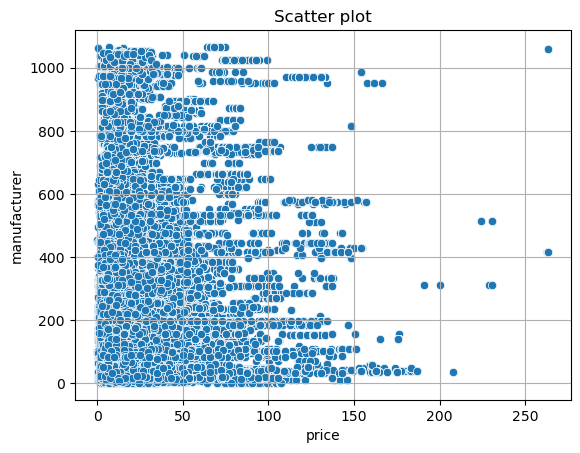

In [73]:
# price vs revenue 
x = 'price'
y = 'manufacturer'
sns.scatterplot(data=df, x=x, y=y)
plt.xlabel(x)
plt.ylabel(y)
plt.title("Scatter plot")
plt.grid(True)
plt.show()


In [74]:
corr = df['price'].corr(df['manufacturer'])
corr

0.12108529028044274

In [75]:
corr = df['price'].corr(df['rrp'])
corr

0.9354254433063806

In [76]:
df['price'].corr(df['compPrice'])

0.9577776992821155

In [77]:
# two cols ar highly correlated 
df['revenue'].corr(df['manufacturer'])

-0.007631032442371783

In [78]:
df['revenue'].corr(df['rrp'])

0.22740090591109877

In [79]:
df['revenue'].corr(df['compPrice'])

0.21496012802703182

In [80]:
df['rrp'].corr(df['compPrice'])

0.9659869242207028

In [81]:
cols = ['price', 'revenue', 'manufacturer', 'rrp', 'compPrice']
def is_correlated(cols): 
    """
    This function takes a list of columns and returns those with more than 90% correlation
    Args:
        cols: A list of column names. 
    Returns:
        A list of highly correlated columns
    """
    c_l = []
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            corr = df[cols[i]].corr(df[cols[j]])
            if abs(corr) >= 0.9:
                # print(f"Columns {cols[i]} and {cols[j]} are highly correlated") 
                s = f"Column {cols[i]} and {cols[j]} with value: {corr}"
                c_l.append(s)
    
    return c_l


# Usage 
cl = is_correlated(cols)
cl

['Column price and rrp with value: 0.9354254433063806',
 'Column price and compPrice with value: 0.9577776992821155',
 'Column rrp and compPrice with value: 0.9659869242207028']

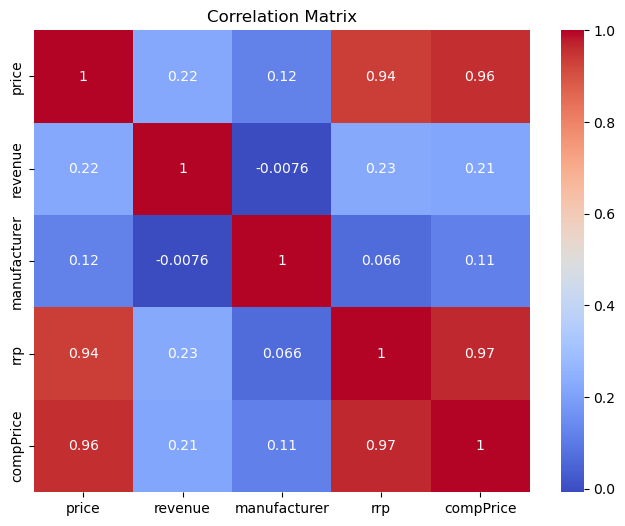

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Finishing up

In [27]:
# Normalization
# Min max 
# (val-min)/(max-min)
# doesn't change the distribution 

# Standardization
# change the distribution and tends the data to follow std normal dist
# (val-mean)/std
# centers the data around the mean 

In [82]:
"""Encoding Cat cols"""
cat_cols 

['group', 'content', 'unit', 'pharmForm']

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668609 entries, 0 to 2668608
Data columns (total 18 columns):
 #   Column          Dtype  
---  ------          -----  
 0   day             int64  
 1   adFlag          int64  
 2   availability    int64  
 3   click           int64  
 4   basket          int64  
 5   order           int64  
 6   price           float64
 7   revenue         float64
 8   manufacturer    int64  
 9   group           object 
 10  content         object 
 11  unit            object 
 12  pharmForm       object 
 13  genericProduct  int64  
 14  salesIndex      int64  
 15  category        float64
 16  rrp             float64
 17  compPrice       float64
dtypes: float64(5), int64(9), object(4)
memory usage: 366.5+ MB


In [84]:
df.columns

Index(['day', 'adFlag', 'availability', 'click', 'basket', 'order', 'price',
       'revenue', 'manufacturer', 'group', 'content', 'unit', 'pharmForm',
       'genericProduct', 'salesIndex', 'category', 'rrp', 'compPrice'],
      dtype='object')

In [85]:
cat_col = ['group', 'content', 'unit', 'pharmForm']

In [86]:
"""Encoding"""

from sklearn.preprocessing import OrdinalEncoder 

encoder = OrdinalEncoder()

# fit
encoder.fit(df[cat_col])

df[cat_col] = encoder.transform(df[cat_col])

print(df)

         day  adFlag  availability  click  basket  order  price  revenue  \
0          1       0             2      1       0      0  16.89     0.00   
1          1       1             1      0       1      0   8.75     0.00   
2          1       0             1      0       1      0  16.06     0.00   
3          1       1             1      0       0      1   6.55     6.55   
4          1       0             1      0       0      1   4.14     4.14   
...      ...     ...           ...    ...     ...    ...    ...      ...   
2668604   92       0             1      1       0      0  18.64     0.00   
2668605   92       0             1      1       0      0  43.18     0.00   
2668606   92       0             1      1       0      0   5.59     0.00   
2668607   92       1             1      0       1      0   6.33     0.00   
2668608   92       1             1      1       0      0   9.85     0.00   

         manufacturer  group  content  unit  pharmForm  genericProduct  \
0            

In [87]:
df 

,day,adFlag,availability,click,basket,order,price,revenue,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,rrp,compPrice
0,1,0,2,1,0,0,16.89,0.00,255,514.0,366.0,5.0,171.0,0,40,193.0,18.25,14.60
1,1,1,1,0,1,0,8.75,0.00,18,362.0,366.0,7.0,160.0,1,40,66.0,18.81,8.57
2,1,0,1,0,1,0,16.06,0.00,41,489.0,237.0,5.0,151.0,0,53,40.0,18.48,14.77
3,1,1,1,0,0,1,6.55,6.55,52,299.0,399.0,1.0,53.0,0,40,25.0,9.31,6.59
4,1,0,1,0,0,1,4.14,4.14,90,445.0,194.0,7.0,83.0,0,53,14.0,8.13,4.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668604,92,0,1,1,0,0,18.64,0.00,917,492.0,92.0,5.0,97.0,0,53,15.0,24.75,22.41
2668605,92,0,1,1,0,0,43.18,0.00,18,262.0,139.0,7.0,74.0,0,40,100.0,46.09,36.87
2668606,92,0,1,1,0,0,5.59,0.00,334,474.0,190.0,7.0,26.0,0,53,1.0,5.88,4.71
2668607,92,1,1,0,1,0,6.33,0.00,84,225.0,366.0,1.0,139.0,0,40,90.0,9.58,6.59


In [88]:
# Save to csv 
df.to_csv('august_data/encoded_data.csv')

Feature Selection Needed? 

In [89]:
df = pd.read_csv('august_data/encoded_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [91]:
"""Lets create a Separate DataFrame for Standardization and Feature Selection"""

df.columns

Index(['day', 'adFlag', 'availability', 'click', 'basket', 'order', 'price',
       'revenue', 'manufacturer', 'group', 'content', 'unit', 'pharmForm',
       'genericProduct', 'salesIndex', 'category', 'rrp', 'compPrice'],
      dtype='object')

In [92]:
"""Feature Selection"""
# price, rrp, compPrice are highly correlated 
# lets drop rrp and compPrice

data = df
data = data.drop(columns = ['rrp', 'compPrice'])
data.columns

Index(['day', 'adFlag', 'availability', 'click', 'basket', 'order', 'price',
       'revenue', 'manufacturer', 'group', 'content', 'unit', 'pharmForm',
       'genericProduct', 'salesIndex', 'category'],
      dtype='object')

In [93]:
"""Standardization"""
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

features = data.drop(columns=['revenue'])
target = data['revenue']

# Scaling
scaler.fit(features)
data_scaled = scaler.transform(features)

In [94]:
df_scaled = pd.concat([pd.DataFrame(data_scaled, columns= features.columns), target], axis = 1)

In [95]:
df_scaled

,day,adFlag,availability,click,basket,order,price,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,revenue
0,-1.934013,-0.696640,2.537097,0.868028,-0.454814,-0.590134,0.229178,0.455885,1.160368,1.183135,-0.132315,1.300762,-0.348833,-0.950950,0.827978,0.00
1,-1.934013,1.435461,-0.246040,-1.152037,2.198701,-0.590134,-0.373670,-0.833341,0.068416,1.183135,0.797724,1.105971,2.866704,-0.950950,-0.527564,0.00
2,-1.934013,-0.696640,-0.246040,-1.152037,2.198701,-0.590134,0.167708,-0.708226,0.980770,0.336471,-0.132315,0.946597,-0.348833,1.075866,-0.805077,0.00
3,-1.934013,1.435461,-0.246040,-1.152037,-0.454814,1.694530,-0.536602,-0.648389,-0.384169,1.399723,-1.992393,-0.788809,-0.348833,-0.950950,-0.965180,6.55
4,-1.934013,-0.696640,-0.246040,-1.152037,-0.454814,1.694530,-0.715086,-0.441678,0.664679,0.054250,0.797724,-0.257562,-0.348833,1.075866,-1.082590,4.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668604,1.658595,-0.696640,-0.246040,0.868028,-0.454814,-0.590134,0.358783,4.057013,1.002322,-0.615206,-0.132315,-0.009647,-0.348833,1.075866,-1.071916,0.00
2668605,1.658595,-0.696640,-0.246040,0.868028,-0.454814,-0.590134,2.176214,-0.833341,-0.649973,-0.306731,0.797724,-0.416936,-0.348833,-0.950950,-0.164663,0.00
2668606,1.658595,-0.696640,-0.246040,0.868028,-0.454814,-0.590134,-0.607699,0.885627,0.873012,0.027996,0.797724,-1.266931,-0.348833,1.075866,-1.221346,0.00
2668607,1.658595,1.435461,-0.246040,-1.152037,2.198701,-0.590134,-0.552895,-0.474316,-0.915777,1.183135,-1.992393,0.734098,-0.348833,-0.950950,-0.271399,0.00


In [96]:
# save to data preprocess done 
df_scaled.to_csv('august_data/normalized_data.csv')

What We have done?

1. We have loaded the data
2. Handled missing values
3. Handled outliers
4. Performed Univariate Analysis
5. Checked for Correlation
6. Encoded Categorical columns
7. Performed Standardization
8. Performed Feature Selection
9. Saved the data

In [2]:
# Unscaled
data = pd.read_csv('fin_data.csv', index_col=0)
# Scaled 
data_s = pd.read_csv('data.csv', index_col=0)

In [7]:
data

,day,adFlag,availability,click,basket,order,price,revenue,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,rrp,compPrice
0,1,0,2,1,0,0,16.89,0.00,255,514.0,366.0,5.0,171.0,0,40,193.0,18.25,14.60
1,1,1,1,0,1,0,8.75,0.00,18,362.0,366.0,7.0,160.0,1,40,66.0,18.81,8.57
2,1,0,1,0,1,0,16.06,0.00,41,489.0,237.0,5.0,151.0,0,53,40.0,18.48,14.77
3,1,1,1,0,0,1,6.55,6.55,52,299.0,399.0,1.0,53.0,0,40,25.0,9.31,6.59
4,1,0,1,0,0,1,4.14,4.14,90,445.0,194.0,7.0,83.0,0,53,14.0,8.13,4.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668604,92,0,1,1,0,0,18.64,0.00,917,492.0,92.0,5.0,97.0,0,53,15.0,24.75,22.41
2668605,92,0,1,1,0,0,43.18,0.00,18,262.0,139.0,7.0,74.0,0,40,100.0,46.09,36.87
2668606,92,0,1,1,0,0,5.59,0.00,334,474.0,190.0,7.0,26.0,0,53,1.0,5.88,4.71
2668607,92,1,1,0,1,0,6.33,0.00,84,225.0,366.0,1.0,139.0,0,40,90.0,9.58,6.59


In [8]:
data_s

,day,adFlag,availability,click,basket,order,price,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,revenue
0,-1.934013,-0.696640,2.537097,0.868028,-0.454814,-0.590134,0.229178,0.455885,1.160368,1.183135,-0.132315,1.300762,-0.348833,-0.950950,0.827978,0.00
1,-1.934013,1.435461,-0.246040,-1.152037,2.198701,-0.590134,-0.373670,-0.833341,0.068416,1.183135,0.797724,1.105971,2.866704,-0.950950,-0.527564,0.00
2,-1.934013,-0.696640,-0.246040,-1.152037,2.198701,-0.590134,0.167708,-0.708226,0.980770,0.336471,-0.132315,0.946597,-0.348833,1.075866,-0.805077,0.00
3,-1.934013,1.435461,-0.246040,-1.152037,-0.454814,1.694530,-0.536602,-0.648389,-0.384169,1.399723,-1.992393,-0.788809,-0.348833,-0.950950,-0.965180,6.55
4,-1.934013,-0.696640,-0.246040,-1.152037,-0.454814,1.694530,-0.715086,-0.441678,0.664679,0.054250,0.797724,-0.257562,-0.348833,1.075866,-1.082590,4.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668604,1.658595,-0.696640,-0.246040,0.868028,-0.454814,-0.590134,0.358783,4.057013,1.002322,-0.615206,-0.132315,-0.009647,-0.348833,1.075866,-1.071916,0.00
2668605,1.658595,-0.696640,-0.246040,0.868028,-0.454814,-0.590134,2.176214,-0.833341,-0.649973,-0.306731,0.797724,-0.416936,-0.348833,-0.950950,-0.164663,0.00
2668606,1.658595,-0.696640,-0.246040,0.868028,-0.454814,-0.590134,-0.607699,0.885627,0.873012,0.027996,0.797724,-1.266931,-0.348833,1.075866,-1.221346,0.00
2668607,1.658595,1.435461,-0.246040,-1.152037,2.198701,-0.590134,-0.552895,-0.474316,-0.915777,1.183135,-1.992393,0.734098,-0.348833,-0.950950,-0.271399,0.00


## Machine learning Models

### **Models**
> Linear Regression

> Lasso Regression

> Elastic Net Regression

> Support Vector Regression

> Random Forest Regression 

> Catboost Regression 

> LightGBM Regression

> XGboost Regression

In [5]:
# Don't use scaled data on Tree based algo and Gradient boosting algos 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Feature and Target
features = data_s.drop(columns=['revenue'])
target = data_s['revenue']

In [5]:
# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size= 0.2, random_state=42)

In [6]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (2134887, 15)
x_test shape: (533722, 15)
y_train shape: (2134887,)
y_test shape: (533722,)


In [7]:
"""Save model and its metric"""
def save_model(model, filename):
    """
    This function saves the model to a file.
    
    Args:
        model: A trained model.
        filename: A string representing the filename.
    
    Returns:
        None
    """
    import pickle
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

import json
def save_metric(y_true, y_pred, filename):
    """
    This function saves the model's metric to a file.
    
    Args:
        y_true: A list of true target values.
        y_pred: A list of predicted target values.
        filename: A string representing the filename.
    
    Returns:
        None
    """
    import pickle
    metric = dict()
    metric['MSE'] = mean_squared_error(y_true, y_pred)
    metric['MAE'] = mean_absolute_error(y_true, y_pred)
    metric['R2'] = r2_score(y_true, y_pred)
    with open(filename, 'w') as file:
        json.dump(metric, file)

In [8]:
# Get Metrics 
def get_score(y_test, y_pred):
    """
    This function calculates the model's metric.
    
    Args:
        y_test: A list of true target values.
        y_pred: A list of predicted target values.
    
    Returns:
        A dictionary of metrics.
    """
    metric = dict()
    metric['MSE'] = mean_squared_error(y_test, y_pred)
    metric['MAE'] = mean_absolute_error(y_test, y_pred)
    metric['R2'] = r2_score(y_test, y_pred).round(2)
    return metric

### *Linear Regression*

In [11]:
from sklearn.linear_model import LinearRegression

# model 
lr = LinearRegression()

def run_linearRegression(model): 
    lr.fit(x_train, y_train)
    return lr 

In [12]:
lr = run_linearRegression(lr)

In [13]:
yp = lr.predict(x_test)

# Res 
get_score(y_test, yp)

# Save model and metrics 
# save_model(lr, 'linearRegression.pkl')
# save_metric(y_test, yp, 'linearRegression.json')

{'MSE': 55.510602464434754, 'MAE': 3.5293280676484313, 'R2': 0.47}

### *Lasso Regression*

In [15]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
# params = {
#     'alpha': [0.001, 0.01, 0.1, 10]
# }

# Model with grid search
# lasso_reg = GridSearchCV(lasso, params)

In [16]:
# Train
lasso.fit(x_train, y_train)

Lasso()

In [17]:
get_score(y_test, lasso.predict(x_test))

{'MSE': 58.11932831345519, 'MAE': 2.91550345755795, 'R2': 0.45}

In [59]:
save_model(lasso, 'lassoRegression.pkl')
save_metric(y_test, lasso.predict(x_test), 'lassoRegression.json')

### *Elastic Net regression*

In [19]:
from sklearn.linear_model import ElasticNet 

elastic_net = ElasticNet(alpha = 0.5, l1_ratio = 0.5, random_state = 42)
elastic_net.fit(x_train, y_train) 

ElasticNet(alpha=0.5, random_state=42)

In [20]:
y_pred = elastic_net.predict(x_test)

get_score(y_test, y_pred)

{'MSE': 57.97103720053404, 'MAE': 3.0287753087553066, 'R2': 0.45}

In [21]:
save_model(elastic_net, 'elasticNetRegression.pkl')
save_metric(y_test, y_pred, 'elasticNetRegression.json')

### *Support Vector Regressor*

In [22]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear', C=1, epsilon = 0.1)

svr.fit(x_train, y_train)

In [ ]:
svr_pred = svr.predict(x_test)
get_score(y_test, svr_pred)

### *Random Forest regression*

In [18]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(
    n_estimators = 100, max_depth = 10, random_state = 42
)

In [19]:
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [20]:
rfr_pred = rfr.predict(x_test)
get_score(y_test, rfr_pred)

{'MSE': 22.03155125822385, 'MAE': 1.0648447553869764, 'R2': 0.79}

In [21]:
! hurray : ) 

'hurray' is not recognized as an internal or external command,
operable program or batch file.


In [23]:
save_model(rfr, 'RandomForestRegressor.pkl')
save_metric(y_test, rfr_pred, 'RandomForestRegressor.json')

### *CatBoost Regressor*

In [12]:
from catboost import CatBoostRegressor
import numpy as np
# from sklearn.metrics import 

In [15]:
df = pd.read_csv('df_missing_values_handled.csv',  index_col = 0)
# df.head(4)

,day,adFlag,availability,click,basket,order,price,revenue,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,rrp,compPrice
0,1,0,2,1,0,0,16.89,0.00,255,2FOI,50,ML,TRO,0,40,193.0,18.25,14.60
1,1,1,1,0,1,0,8.75,0.00,18,1COJ0FIK,50,ST,TAB,1,40,66.0,18.81,8.57
2,1,0,1,0,1,0,16.06,0.00,41,22OI7,2X50,ML,STI,0,53,40.0,18.48,14.77
3,1,1,1,0,0,1,6.55,6.55,52,18OZ00IS,60,G,GEL,0,40,25.0,9.31,6.59


In [18]:
f = df.drop(columns='revenue')
t = df['revenue']

cat_indices = np.where(f.dtypes == object)[0]
cat_indices

array([ 8,  9, 10, 11], dtype=int64)

In [19]:
x_tr, x_ts, y_tr, y_ts = train_test_split(f, t, test_size= 0.2, random_state=42)

In [20]:
cbr = CatBoostRegressor(
    iterations = 100,
    depth = 6,
    learning_rate = 0.1, 
    loss_function = 'RMSE',
    eval_metric = 'RMSE', 
    cat_features = cat_indices,
    random_state = 42
)

cbr.fit(x_tr, y_tr)

0:	learn: 9.5340903	total: 1.59s	remaining: 2m 37s
1:	learn: 8.8756884	total: 2.61s	remaining: 2m 8s
2:	learn: 8.2983795	total: 3.52s	remaining: 1m 53s
3:	learn: 7.7950719	total: 4.38s	remaining: 1m 45s
4:	learn: 7.3573422	total: 5.32s	remaining: 1m 41s
5:	learn: 6.9777643	total: 6.22s	remaining: 1m 37s
6:	learn: 6.6559348	total: 6.97s	remaining: 1m 32s
7:	learn: 6.3791424	total: 7.7s	remaining: 1m 28s
8:	learn: 6.1431282	total: 8.54s	remaining: 1m 26s
9:	learn: 5.9442731	total: 9.46s	remaining: 1m 25s
10:	learn: 5.7741253	total: 10.2s	remaining: 1m 22s
11:	learn: 5.6313454	total: 11s	remaining: 1m 20s
12:	learn: 5.5118850	total: 11.8s	remaining: 1m 18s
13:	learn: 5.4126611	total: 12.6s	remaining: 1m 17s
14:	learn: 5.3298664	total: 13.3s	remaining: 1m 15s
15:	learn: 5.2605797	total: 14s	remaining: 1m 13s
16:	learn: 5.2038741	total: 14.7s	remaining: 1m 11s
17:	learn: 5.1569725	total: 15.3s	remaining: 1m 9s
18:	learn: 5.1173039	total: 16s	remaining: 1m 8s
19:	learn: 5.0843946	total: 16.7

In [21]:
y_pr = cbr.predict(x_ts)

get_score(y_ts, y_pr)

{'MSE': 22.153967737385067, 'MAE': 1.0847843609689507, 'R2': 0.79}

In [22]:
save_model(cbr, 'CatBoostRegressor.pkl')
save_metric(y_ts, y_pr, 'CatBoostRegressor.json')

### *LightGBM Regressor*

In [26]:
import lightgbm as lgb


lgb = lgb.LGBMRegressor(
    objective = 'regression', 
    metric = 'rmse',
    num_leaves = 31, 
    learning_rate = 0.1,
    n_estimators = 100,
    random_state = 42
)

lgb.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.234288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1507
[LightGBM] [Info] Number of data points in the train set: 2134887, number of used features: 15
[LightGBM] [Info] Start training from score 3.778611


LGBMRegressor(metric='rmse', objective='regression', random_state=42)

In [27]:
y_p = lgb.predict(x_test)

get_score(y_test, y_p)

{'MSE': 21.634460258315727, 'MAE': 1.061390419376324, 'R2': 0.79}

In [28]:
save_model(lgb, 'lightGBM.pkl')
save_metric(y_test, y_p, 'lightGBM.json')

### *XGBoost*

In [31]:
# !pip install xgboost
import xgboost as xgb 

xgb = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    max_depths = 6,
    n_estimators = 100,
    learning_rate = 0.1,
    random_state = 42
)

xgb.fit(x_train, y_train)

c:\Users\91790\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:06:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depths" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_depths=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [32]:
y_pred = xgb.predict(x_test)

get_score(y_test, y_pred)

{'MSE': 21.8010432112991, 'MAE': 1.0705830352038312, 'R2': 0.79}

In [33]:
save_model(xgb, 'xgbRegressor.pkl')
save_metric(y_test, y_pred, 'xgbRegressor.json ')

In [70]:
y_test.sample(20)
y_test.loc[[2581650]]

2581650    15.3
Name: revenue, dtype: float64

In [71]:
sam = x_test.loc[[2581650]]
sam

,day,adFlag,availability,click,basket,order,price,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category
2581650,1.579637,-0.69664,-0.24604,-1.152037,-0.454814,1.69453,-0.455136,-0.648389,-2.165773,1.183135,-1.992393,-0.788809,-0.348833,-0.95095,0.2943


In [72]:
res = xgb.predict(sam)
res

array([9.145314], dtype=float32)

In [47]:
x_test

,day,adFlag,availability,click,basket,order,price,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category
648681,-0.789116,1.435461,-0.24604,-1.152037,-0.454814,1.694530,-0.821732,-0.485196,-0.060894,-0.615206,-0.132315,0.220560,2.866704,-0.950950,-0.527564
869897,-0.552241,1.435461,-0.24604,-1.152037,-0.454814,1.694530,2.233240,-0.398159,-0.994799,1.170008,-0.132315,0.238268,-0.348833,-0.950950,0.080828
1788518,0.592656,-0.696640,-0.24604,-1.152037,-0.454814,1.694530,1.340818,2.419642,1.174735,-1.205901,0.797724,-0.222146,-0.348833,1.075866,-0.687668
1372600,0.079427,-0.696640,-0.24604,0.868028,-0.454814,-0.590134,-0.195926,-0.893179,-0.542214,-1.205901,0.332705,-0.222146,-0.348833,1.075866,-0.580932
1194970,-0.157449,-0.696640,-0.24604,0.868028,-0.454814,-0.590134,1.011251,0.885627,0.650311,-1.205901,0.797724,1.105971,-0.348833,1.075866,0.315647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532221,-0.947033,-0.696640,-0.24604,0.868028,-0.454814,-0.590134,-0.379595,0.151258,0.959219,0.421793,-0.132315,-1.355472,-0.348833,1.075866,1.447044
1002447,-0.394324,1.435461,-0.24604,0.868028,-0.454814,-0.590134,0.440990,0.455885,1.160368,-1.159958,-0.132315,1.300762,-0.348833,-0.950950,2.461032
1929157,0.750573,-0.696640,-0.24604,0.868028,-0.454814,-0.590134,-0.862465,0.118619,0.887380,-0.195155,-1.992393,-1.036724,-0.348833,1.075866,-0.378135
196906,-1.578700,1.435461,-0.24604,-1.152037,2.198701,-0.590134,1.255649,-0.833341,-1.698821,1.859153,0.797724,-0.629435,-0.348833,-0.950950,1.970049
